In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
# Load the dataset
data = pd.read_csv("Dry_Bean_Dataset new.csv")

In [8]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [10]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

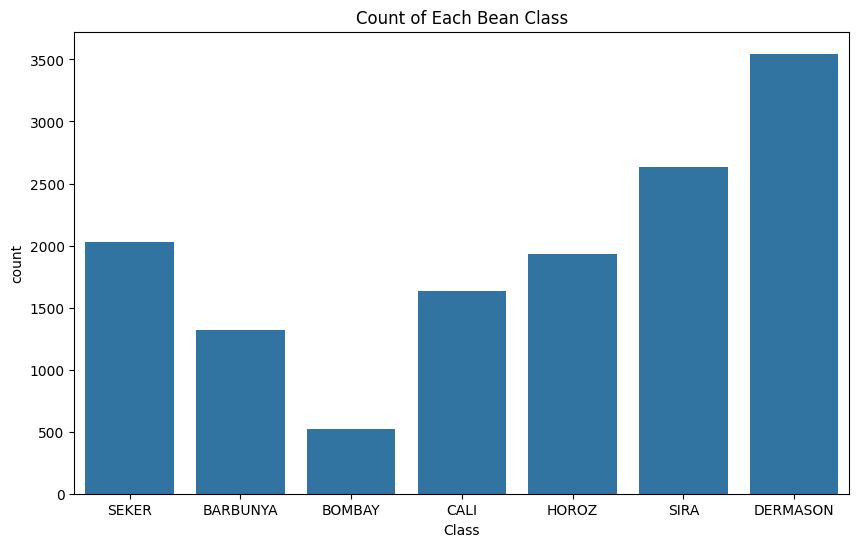

In [11]:
# Count plot for 'Class'
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Class')
plt.title('Count of Each Bean Class')
plt.show()

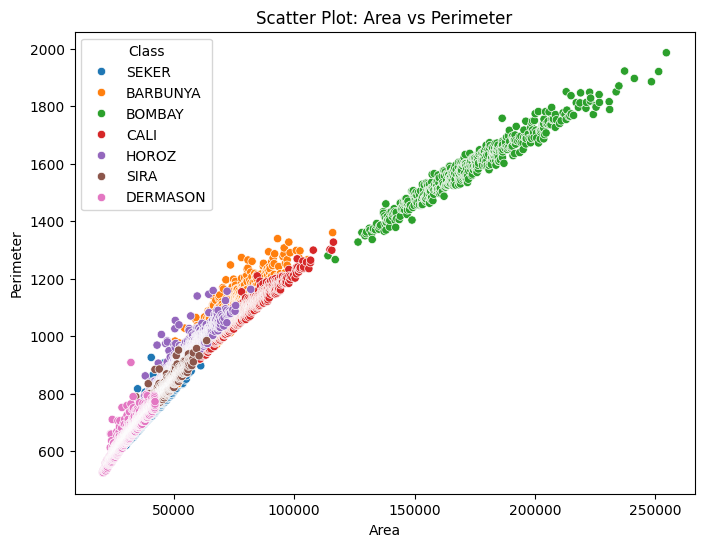

In [12]:
# Example: Scatter plot between 'Area' and 'Perimeter'
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Area', y='Perimeter', hue='Class')
plt.title('Scatter Plot: Area vs Perimeter')
plt.show()

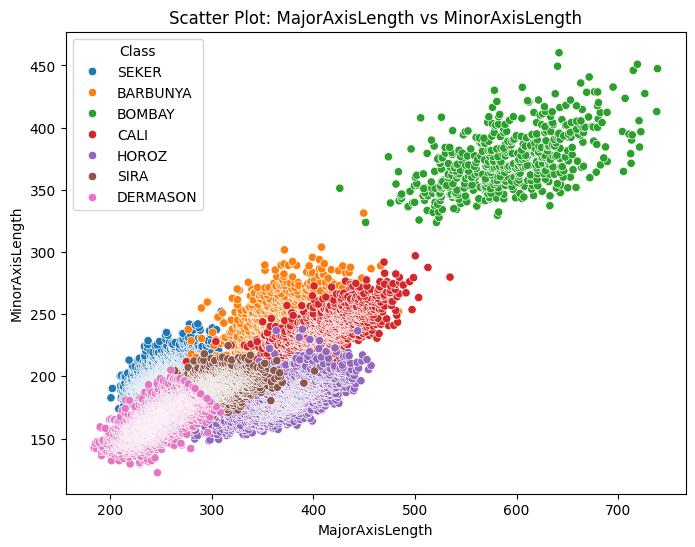

In [14]:
# Example: Scatter plot between 'Area' and 'Perimeter'
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='MajorAxisLength', y='MinorAxisLength', hue='Class')
plt.title('Scatter Plot: MajorAxisLength vs MinorAxisLength')
plt.show()

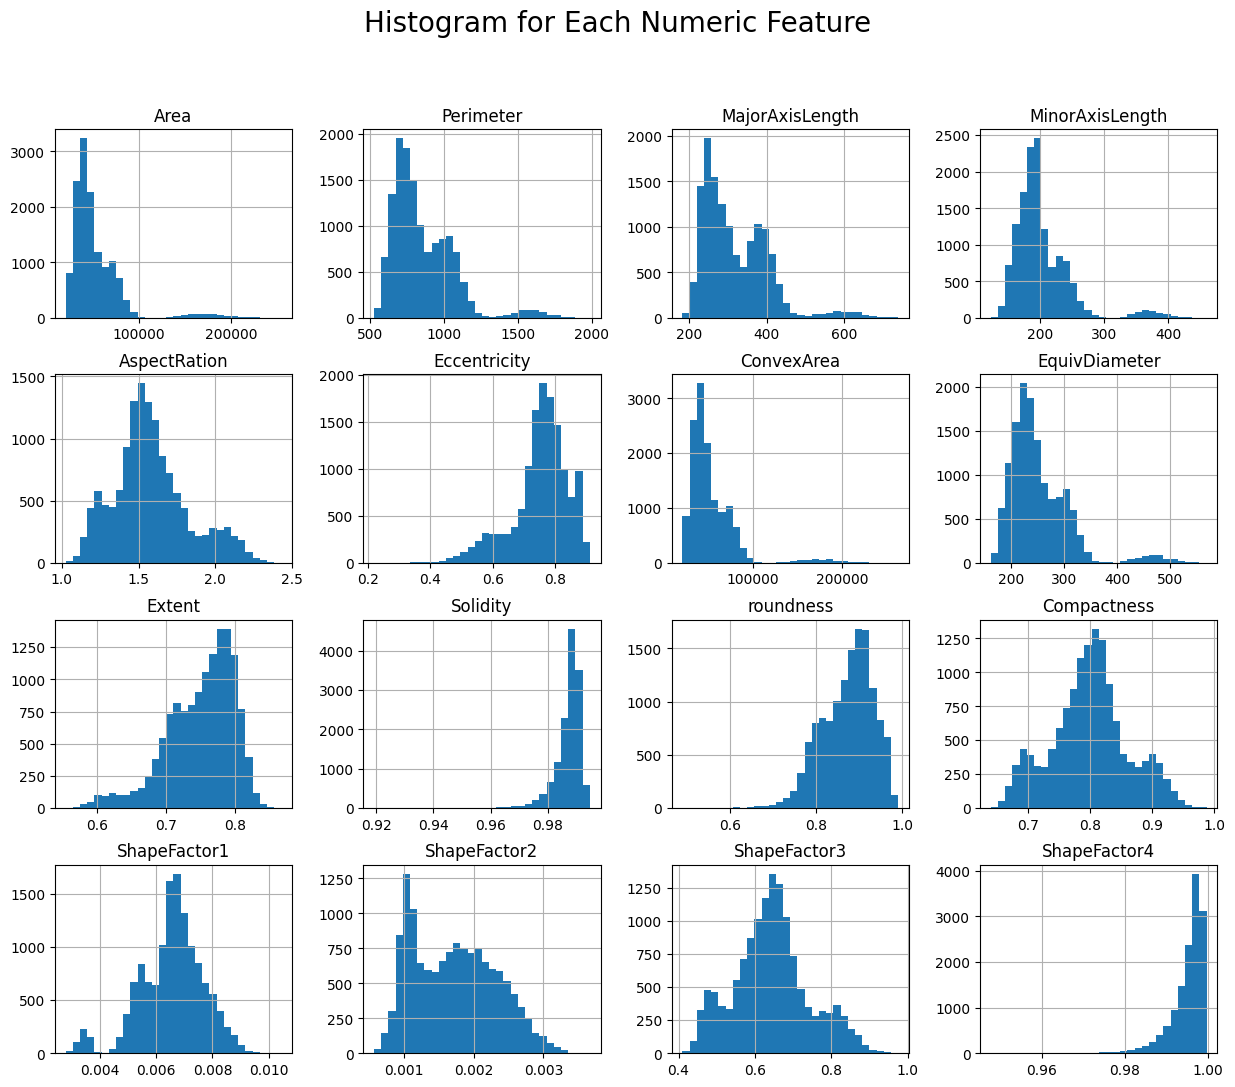

In [15]:
# Histogram for all numeric columns
data.hist(figsize=(15, 12), bins=30)
plt.suptitle('Histogram for Each Numeric Feature', fontsize=20)
plt.show()

In [22]:
# Define the columns you want to transform
columns_to_transform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']


In [23]:
from scipy.stats import rankdata, norm

In [24]:
# Create a copy of the original dataframe for transformed data
df_transformed = data.copy()

# Apply Rank-Based Inverse Normal Transformation to each column
for col in columns_to_transform:
    # Rank the data
    ranks = rankdata(data[col], method='average')
    
    # Convert ranks to quantiles of the normal distribution
    quantiles = (ranks - 0.5) / len(df[col])
    transformed_data = norm.ppf(quantiles)
    
    # Store the transformed data
    df_transformed[col] = transformed_data

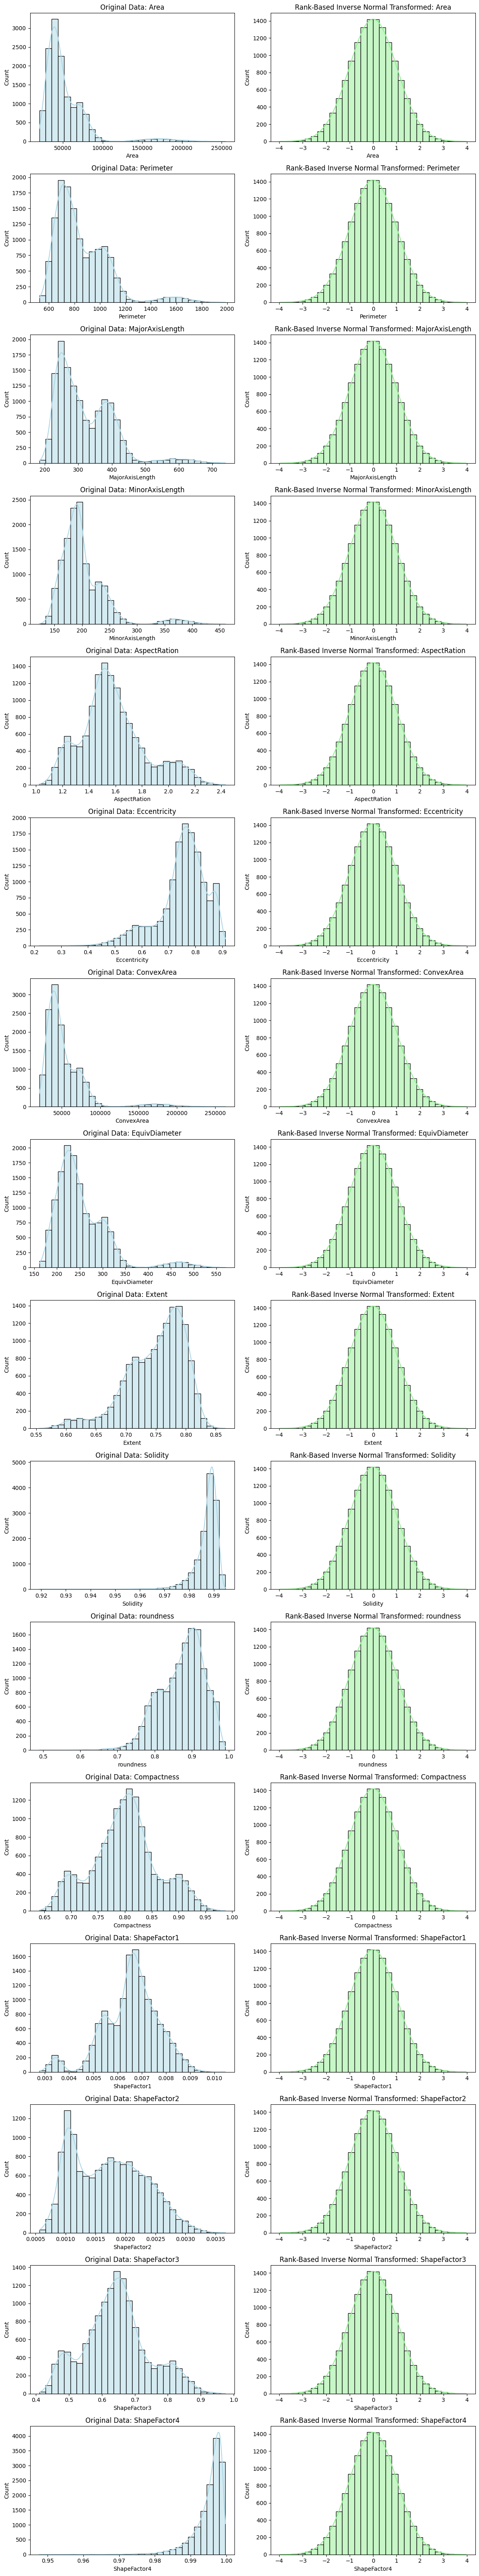

In [25]:
# Set up the figure for subplots
n_cols = len(columns_to_transform)
fig, axes = plt.subplots(n_cols, 2, figsize=(12, 4 * n_cols))

# Loop through each column to plot before and after transformation
for i, col in enumerate(columns_to_transform):
    # Plot the original data
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color='lightblue', edgecolor='black')
    axes[i, 0].set_title(f'Original Data: {col}')
    
    # Plot the Rank-Based Inverse Normal-transformed data
    sns.histplot(df_transformed[col], bins=30, kde=True, ax=axes[i, 1], color='lightgreen', edgecolor='black')
    axes[i, 1].set_title(f'Rank-Based Inverse Normal Transformed: {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
df_transformed.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.528877,-1.749783,-2.390518,-0.744431,-1.720736,-1.720736,-1.536028,-1.528877,0.081120,0.201728,1.597602,1.723983,0.725371,2.539725,1.723983,1.316490,SEKER
1,-1.489762,-1.390097,-2.742464,-0.413715,-2.812063,-2.812063,-1.478681,-1.489762,0.581223,-0.787901,0.064317,2.802589,0.391546,3.562493,2.802589,1.052047,SEKER
2,-1.407735,-1.567959,-2.216320,-0.670392,-1.632897,-1.632897,-1.409722,-1.407735,0.412712,0.483168,1.334668,1.641338,0.647737,2.311740,1.641338,1.751488,SEKER
3,-1.328411,-1.293193,-2.314413,-0.423162,-2.154197,-2.154197,-1.281803,-1.328411,0.543899,-1.818496,0.387176,2.086256,0.431030,2.690870,2.086256,-0.571005,SEKER
4,-1.307345,-1.611615,-2.677361,-0.096836,-3.263089,-3.263089,-1.320663,-1.307345,0.285220,1.066896,3.195491,3.303427,0.067824,3.964759,3.303427,1.918647,SEKER


In [29]:
df_norm = df_transformed.copy()

In [30]:
df_norm.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.528877,-1.749783,-2.390518,-0.744431,-1.720736,-1.720736,-1.536028,-1.528877,0.081120,0.201728,1.597602,1.723983,0.725371,2.539725,1.723983,1.316490,SEKER
1,-1.489762,-1.390097,-2.742464,-0.413715,-2.812063,-2.812063,-1.478681,-1.489762,0.581223,-0.787901,0.064317,2.802589,0.391546,3.562493,2.802589,1.052047,SEKER
2,-1.407735,-1.567959,-2.216320,-0.670392,-1.632897,-1.632897,-1.409722,-1.407735,0.412712,0.483168,1.334668,1.641338,0.647737,2.311740,1.641338,1.751488,SEKER
3,-1.328411,-1.293193,-2.314413,-0.423162,-2.154197,-2.154197,-1.281803,-1.328411,0.543899,-1.818496,0.387176,2.086256,0.431030,2.690870,2.086256,-0.571005,SEKER
4,-1.307345,-1.611615,-2.677361,-0.096836,-3.263089,-3.263089,-1.320663,-1.307345,0.285220,1.066896,3.195491,3.303427,0.067824,3.964759,3.303427,1.918647,SEKER


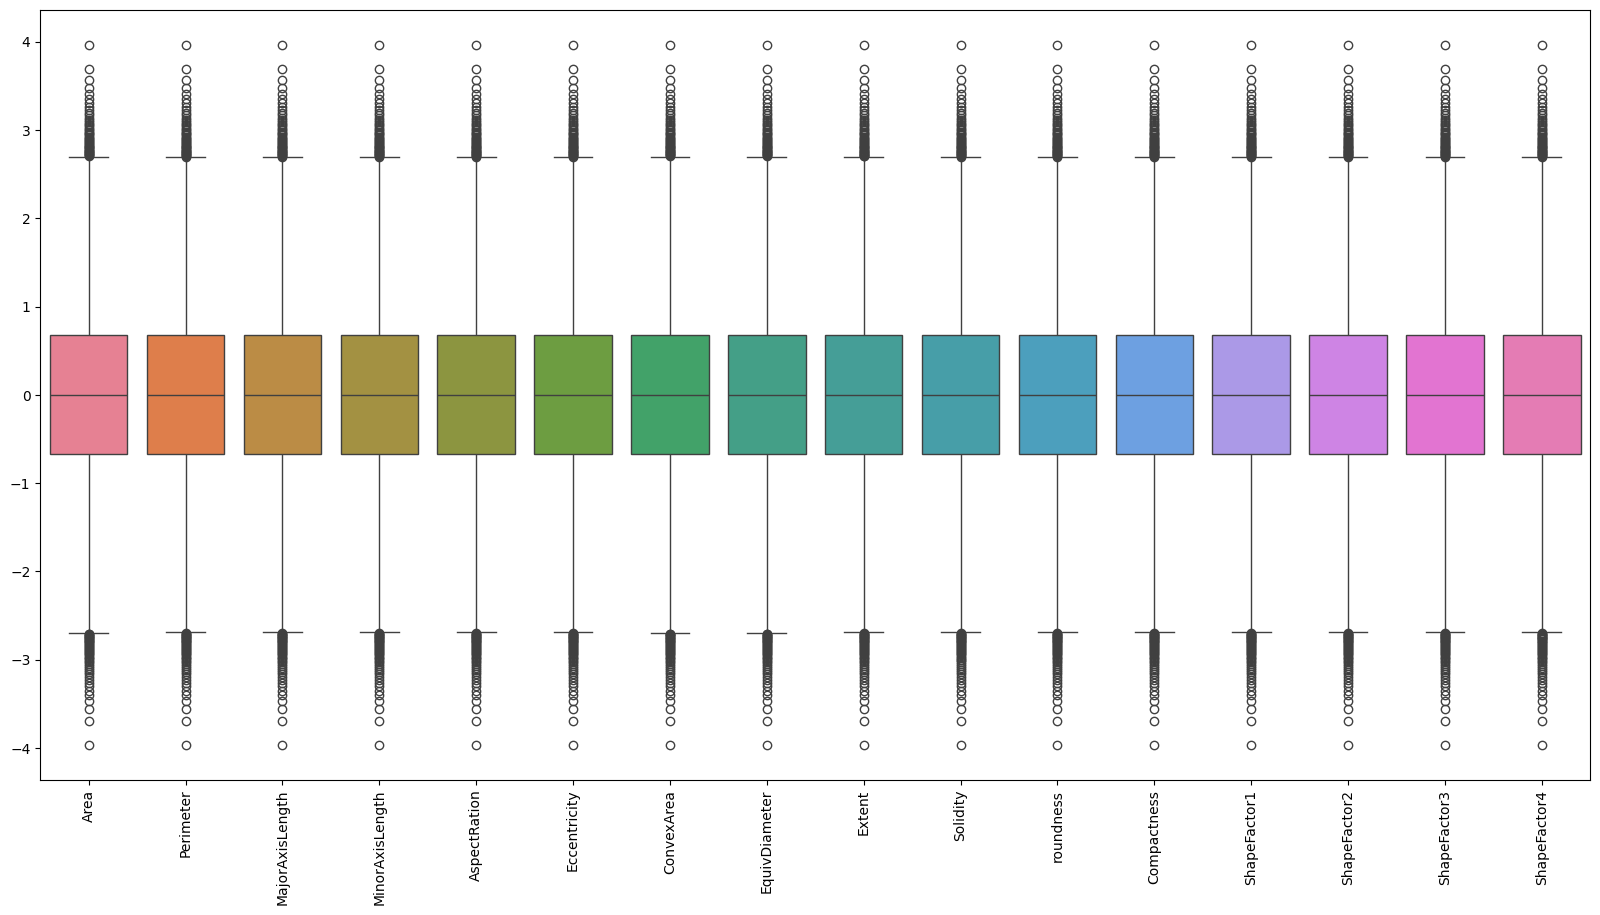

In [43]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = df_norm.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

In [40]:
import numpy as np
from scipy import stats

def detect_and_cap_outliers(df, z_threshold=3):
    df_capped = df.copy()
    
    for col in df.columns:
        if df[col].dtype != 'object':  # Skip the 'Class' column
            # Calculate Z-scores for each column
            z_scores = np.abs(stats.zscore(df[col]))
            
            # Define the 1st and 99th percentile values
            lower_bound = np.percentile(df[col], 1)
            upper_bound = np.percentile(df[col], 99)
            
            # Cap values beyond the threshold
            df_capped[col] = np.where(z_scores > z_threshold, 
                                      np.where(df[col] > upper_bound, upper_bound, lower_bound), 
                                      df[col])
    return df_capped

# Apply the revised outlier capping on df_norm
capped_data = detect_and_cap_outliers(df_norm)


In [44]:
capped_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.528877,-1.749783,-2.390518,-0.744431,-1.720736,-1.720736,-1.536028,-1.528877,0.081120,0.201728,1.597602,1.723983,0.725371,2.539725,1.723983,1.316490,SEKER
1,-1.489762,-1.390097,-2.742464,-0.413715,-2.812063,-2.812063,-1.478681,-1.489762,0.581223,-0.787901,0.064317,2.802589,0.391546,2.325000,2.802589,1.052047,SEKER
2,-1.407735,-1.567959,-2.216320,-0.670392,-1.632897,-1.632897,-1.409722,-1.407735,0.412712,0.483168,1.334668,1.641338,0.647737,2.311740,1.641338,1.751488,SEKER
3,-1.328411,-1.293193,-2.314413,-0.423162,-2.154197,-2.154197,-1.281803,-1.328411,0.543899,-1.818496,0.387176,2.086256,0.431030,2.690870,2.086256,-0.571005,SEKER
4,-1.307345,-1.611615,-2.677361,-0.096836,-2.325000,-2.325000,-1.320663,-1.307345,0.285220,1.066896,2.325000,2.325000,0.067824,2.325000,2.325000,1.918647,SEKER


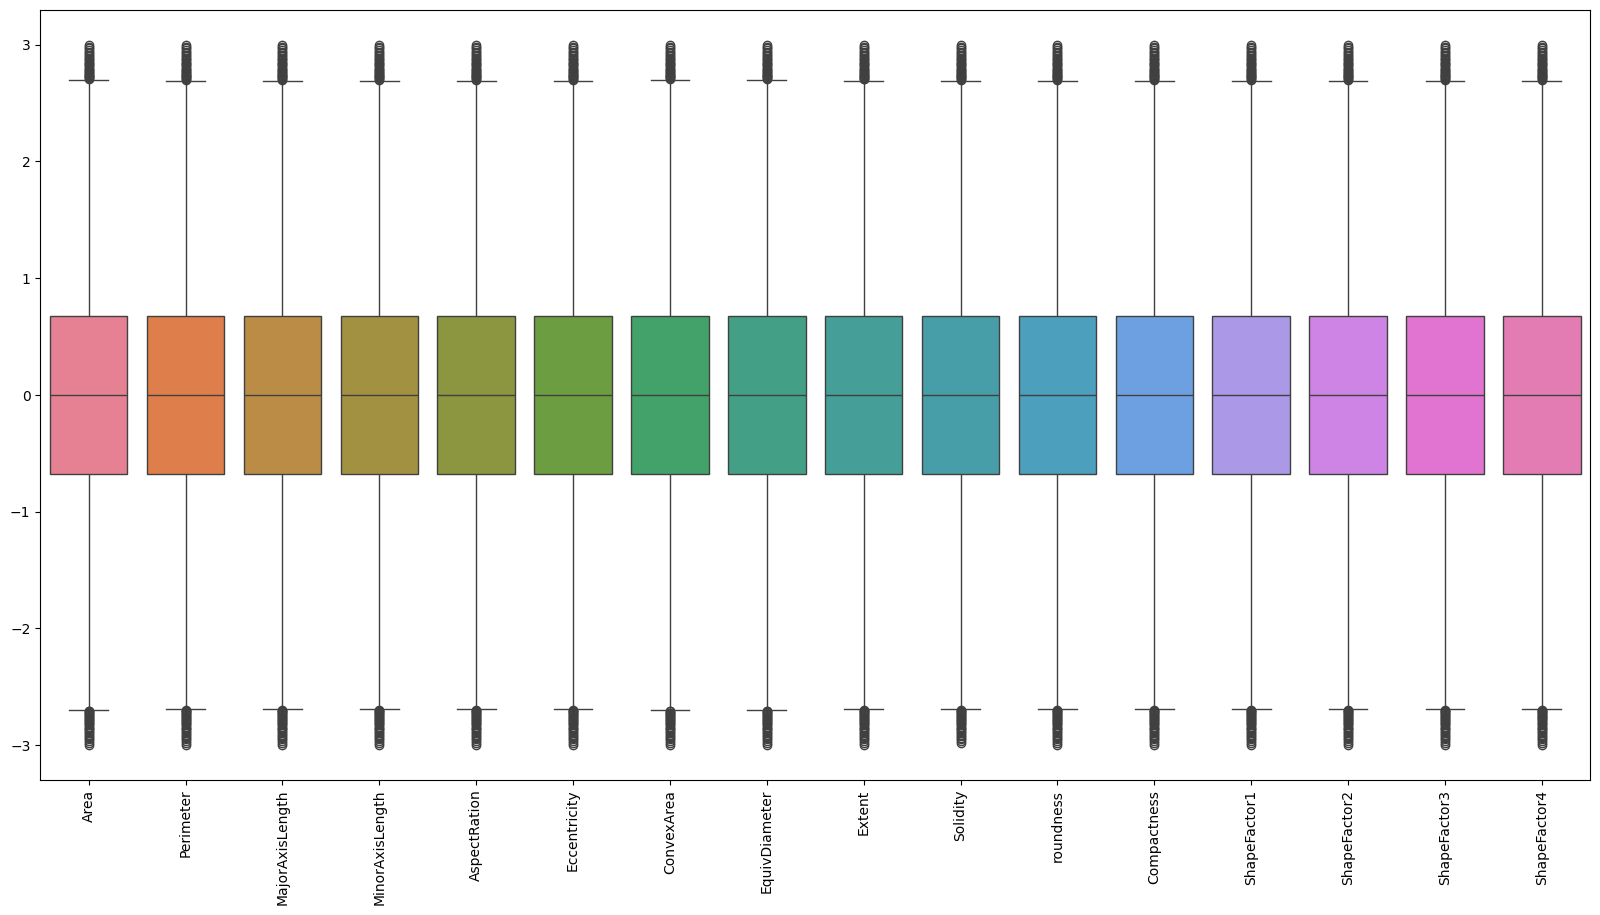

In [42]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = capped_data.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

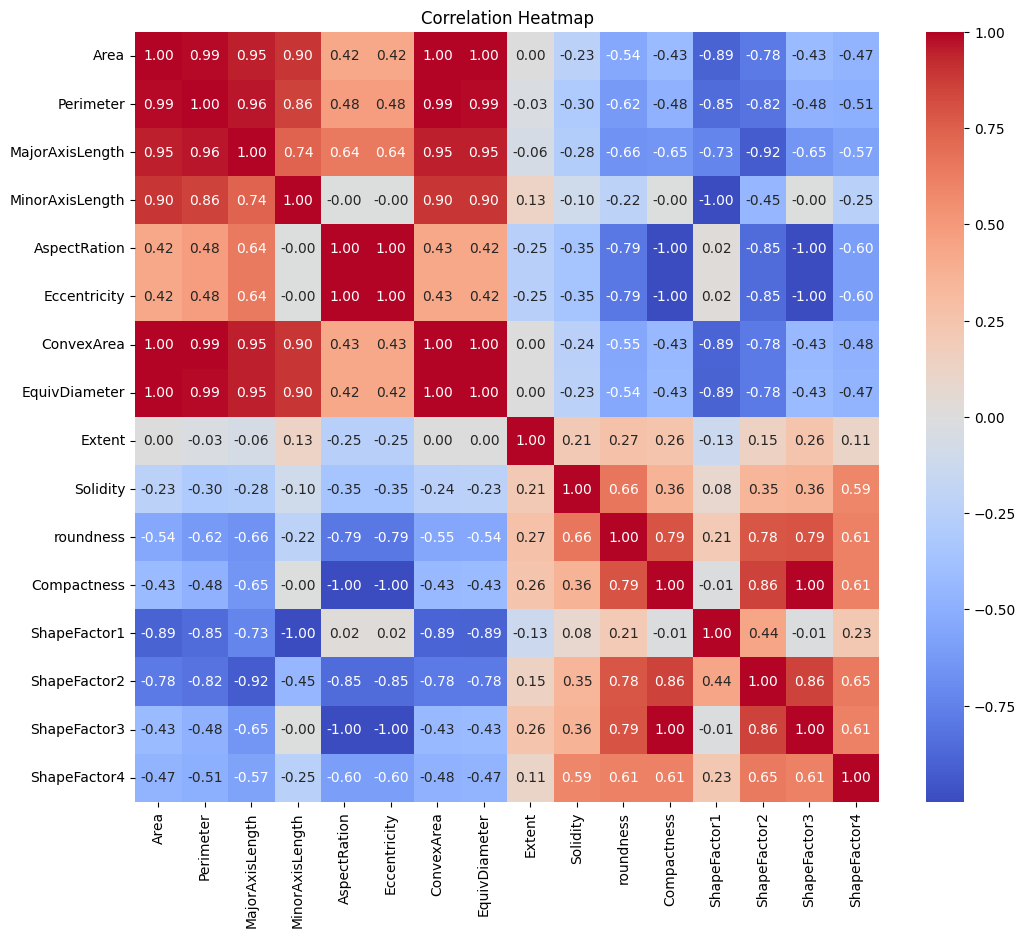

In [45]:
# Exclude non-numeric columns, such as 'Class'
numeric_data = capped_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [47]:
from sklearn.decomposition import PCA

# Exclude the 'Class' column (or any other object columns) from capped_data
numeric_data = capped_data.select_dtypes(include=[np.number])

# PCA with 4 components
pca = PCA(n_components=4)
principal_components = pca.fit_transform(numeric_data)

# Create a DataFrame for PCA results
pca_data = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Add the 'Class' column back to the PCA DataFrame
pca_data['Class'] = capped_data['Class']

# Variance explained by each principal component
print(pca.explained_variance_ratio_)



[0.59666383 0.24235302 0.06889107 0.05460354]


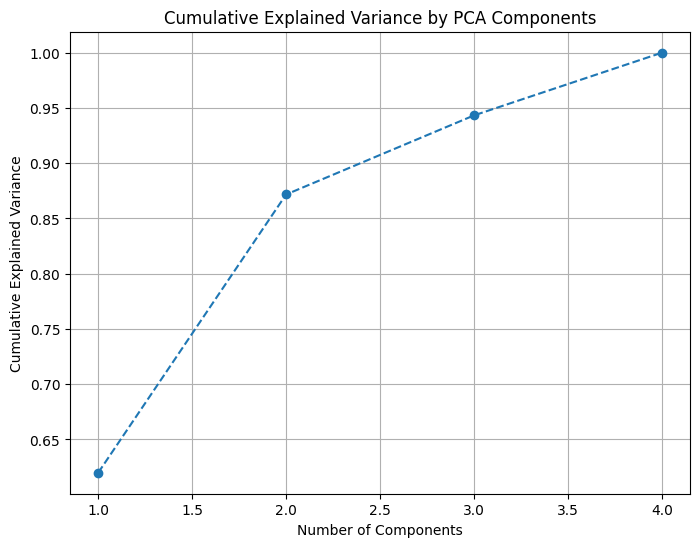

In [49]:
# Fit PCA to the numeric data
pca = PCA()
pca.fit(numeric_data)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [50]:
from sklearn.model_selection import train_test_split

# Train-test split
X = pca_data.drop('Class', axis=1)
y = pca_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}: Accuracy = {accuracy * 100:.2f}%')


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 89.23%
Random Forest: Accuracy = 88.61%
SVM: Accuracy = 89.91%
KNN: Accuracy = 88.10%
Gradient Boosting: Accuracy = 89.15%


In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision, Recall, F1-Score (macro averaged for all classes)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print accuracy, precision, recall, and F1 score
    print(f'\nModel: {model_name}')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Accuracy: 89.23%
Precision: 0.90
Recall: 0.89
F1 Score: 0.89

Model: Random Forest
Accuracy: 88.74%
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Model: SVM
Accuracy: 89.91%
Precision: 0.90
Recall: 0.90
F1 Score: 0.90

Model: KNN
Accuracy: 88.10%
Precision: 0.89
Recall: 0.88
F1 Score: 0.88

Model: Gradient Boosting
Accuracy: 89.15%
Precision: 0.90
Recall: 0.89
F1 Score: 0.89
